## 1. Pandas 란?
***
파일의 데이터를 모두 메모리로 읽은다음 메모리 위에서 데이터를 처리한다.

 ### Pandas 자료구조란?
>  * Series는 1차원 데이터를 다루는 데 효과적이다
 * DataFrame은 행과 열로 구성된 2차원 데이터를 다루는 데 효과적인 자료구조입니다.
 * 엑셀과 거의 비슷하게 row와 column으로 이뤄진 데이터 객체를 만들 수 있도록 해줍니다.
***

In [1]:
import pandas as pd # panda 를 pd 로 정의한다 (전체 읽어오기)
from pandas import Series, DataFrame  #판다스를 불러올 때 (series, dataframe만 들고오기)
import numpy as np

### 오류가 날시
> * conda install pandas
* pip3 install pandas

## 2. 데이터 생성
***


###  2.1 Series
> Series 자료구조 생성법
 * pd.Series(value)
 * 리스트, 튜플, 딕셔너리 값을 사용하여 만들 수 있다.

#### pd.values 함수
 * Pandas 로 만든 자로구조의 values 값만 확인해서 ndarray 값으로 리턴해준다.

#### pd.index 함수
 * Pandas 로 만든 자로구조의 index 값만 확인해서 pandas 객체로 리턴해준다.
 * Pandas 객체지만 리스트처럼 indexing 가능하다.



In [2]:
temp= pd.Series([ 4,  7, -5,  3])
temp

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
temp.values

array([ 4,  7, -5,  3])

In [4]:
temp.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
temp2=pd.Series ((2,3,4,6) ,dtype=int,index=('a','b','c','d'))
temp2

a    2
b    3
c    4
d    6
dtype: int64

In [6]:
temp2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [7]:
type(temp2.values)

numpy.ndarray

In [8]:
temp2[0] #list

2

In [9]:
temp2['a'] #dic key 접근 

2

In [10]:
temp.append(temp2) #추가 해줄때는 따로 값을 추가 하지 못하고 pandas 객체로 만들어 append

0    4
1    7
2   -5
3    3
a    2
b    3
c    4
d    6
dtype: int64

### 2.2 시계열 자료
> 시계열 자료는 인덱스가 날짜 혹은 시간인 데이터를 말한다.
 * DatetimeIndex 자료형으로 만들어야 한다.
 * 미리 정의된 자료형으로 생성 가능하다.
 * 다른 자료형도 시계형으로 형변환이 쉽다.

#### pd.to_datetime 함수
 *  날짜/시간을 나타내는 문자열을 자동으로 datetime 자료형으로 바꾼 후 DatetimeIndex 자료형 인덱스를 생성한다.


In [3]:
date_str = ["2018, 1, 1", "2018, 1, 4", "2018, 1, 5", "2018, 1, 6"]
idx = pd.to_datetime(date_str)
idx

DatetimeIndex(['2018-01-01', '2018-01-04', '2018-01-05', '2018-01-06'], dtype='datetime64[ns]', freq=None)

In [4]:
np.random.seed(0)
temp_time= pd.Series(np.random.randn(4), index=idx)
temp_time

2018-01-01    1.764052
2018-01-04    0.400157
2018-01-05    0.978738
2018-01-06    2.240893
dtype: float64

#### pd.date_range 함수
 * Pandas 로 만든 자로구조의 values 값만 확인해서 ndarray 값으로 리턴해준다.
 * 모든 날짜/시간을 일일히 입력할 필요없이 시작일과 종료일 또는 시작일과 기간을 입력하면 범위 내의 인덱스를 생성해 준다.

In [13]:
pd.date_range("2018-4-1", "2018-4-30")

DatetimeIndex(['2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28',
               '2018-04-29', '2018-04-30'],
              dtype='datetime64[ns]', freq='D')

In [14]:
dates= pd.date_range('20180719',periods=10) #10개 까지 
dates

DatetimeIndex(['2018-07-19', '2018-07-20', '2018-07-21', '2018-07-22',
               '2018-07-23', '2018-07-24', '2018-07-25', '2018-07-26',
               '2018-07-27', '2018-07-28'],
              dtype='datetime64[ns]', freq='D')

#### 날짜 생성시 테크닉
##### freq 인수로 특정한 날짜만 생성되도록 할 수 있다. 많이 사용되는 freq 인수값은 다음과 같다.

* s: 초
* T: 분
* H: 시간
* D: 일(day)
* B: 주말이 아닌 평일
* W: 주(일요일)
* W-MON: 주(월요일)
* M: 각 달(month)의 마지막 날
* MS: 각 달의 첫날
* BM: 주말이 아닌 평일 중에서 각 달의 마지막 날
* BMS: 주말이 아닌 평일 중에서 각 달의 첫날
* WOM-2THU: 각 달의 두번째 목요일
* Q-JAN: 각 분기의 첫달의 마지막 날
* Q-DEC: 각 분기의 마지막 달의 마지막 날

In [15]:
pd.date_range("2018-4-1", "2018-12-31", freq="BM")

DatetimeIndex(['2018-04-30', '2018-05-31', '2018-06-29', '2018-07-31',
               '2018-08-31', '2018-09-28', '2018-10-31', '2018-11-30',
               '2018-12-31'],
              dtype='datetime64[ns]', freq='BM')

### 2.3 DataFrame
DataFrame은 여러 개의 칼럼(Column)으로 구성된 2차원 형태의 자료구조입니다.
> DataFrame 자료구조 생성법
 * pd.Datadrame(value)
 * 리스트, 튜플, 딕셔너리 값을 사용하여 만들 수 있다.

#### pd.values 함수
 * Pandas 로 만든 자로구조의 values 값만 확인해서 ndarray 값으로 리턴해준다.

#### pd.index 함수
 * Pandas 로 만든 자로구조의 index 값만 확인해서 pandas 객체로 리턴해준다.
 * Pandas 객체지만 리스트처럼 indexing 가능하다.
 
#### pd.columns 함수
 * 열 방향의 index를 리턴해준다.

In [32]:
raw_data = {'col0': [1, 2, 3, 4],
            'col1': [10, 20, 30, 40],
            'col2': [100, 200, 300, 400]}

frame1 = DataFrame(raw_data)
frame1

col0  col1  col2
0     1    10   100
1     2    20   200
2     3    30   300
3     4    40   400

In [33]:
frame1.index

RangeIndex(start=0, stop=4, step=1)

In [34]:
frame1.columns

Index(['col0', 'col1', 'col2'], dtype='object')

In [35]:
frame1.values

array([[  1,  10, 100],
       [  2,  20, 200],
       [  3,  30, 300],
       [  4,  40, 400]], dtype=int64)

In [36]:
pd.DataFrame(frame1,columns=['col2','col1','col0']) # 열의 순서를 변경 할 수 있다

col2  col1  col0
0   100    10     1
1   200    20     2
2   300    30     3
3   400    40     4

In [37]:
frame1['addcol']=[1,np.nan,3,3] # 갯수를 맞추어 추가해주면 된다.
frame1

col0  col1  col2  addcol
0     1    10   100     1.0
1     2    20   200     NaN
2     3    30   300     3.0
3     4    40   400     3.0

#### 요소 삭제 
> * del -> 기존 데이터 원본을 건드림 조심해서 쓰는게 좋음
* drop -> 데이터 복사를 해서 불필요한 오버헤드가 있을 수 있지만 안정성이 높다.

In [38]:
del frame1["col0"]

In [39]:
frame1

col1  col2  addcol
0    10   100     1.0
1    20   200     NaN
2    30   300     3.0
3    40   400     3.0

In [40]:
temp_frame=frame1.drop(1)
temp_frame

col1  col2  addcol
0    10   100     1.0
2    30   300     3.0
3    40   400     3.0

In [41]:
temp_frame=frame1.drop('col1',axis=1) #1 행 줄, 0 열 줄
temp_frame

col2  addcol
0   100     1.0
1   200     NaN
2   300     3.0
3   400     3.0

In [42]:
frame2=pd.DataFrame(raw_data,columns=['col0','col1','col2','col3'],
             index=['zero','one','two','three'])
frame2.index.name='num'
frame2.columns.name='칼럼이름'
frame2

칼럼이름   col0  col1  col2 col3
num                         
zero      1    10   100  NaN
one       2    20   200  NaN
two       3    30   300  NaN
three     4    40   400  NaN

In [43]:
frame2.fillna(0)

칼럼이름   col0  col1  col2  col3
num                          
zero      1    10   100     0
one       2    20   200     0
two       3    30   300     0
three     4    40   400     0

In [44]:
frame2.T

num  zero  one  two three
칼럼이름                     
col0    1    2    3     4
col1   10   20   30    40
col2  100  200  300   400
col3  NaN  NaN  NaN   NaN

In [45]:
frame2[:2]

칼럼이름  col0  col1  col2 col3
num                        
zero     1    10   100  NaN
one      2    20   200  NaN

In [46]:
frame2.col0

num
zero     1
one      2
two      3
three    4
Name: col0, dtype: int64

In [47]:
frame2.ix["zero"]

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


칼럼이름
col0      1
col1     10
col2    100
col3    NaN
Name: zero, dtype: object

In [32]:
frame2.loc['zero'] 

칼럼이름
col0      1
col1     10
col2    100
col3    NaN
Name: zero, dtype: object

In [50]:
frame2.loc[:,"col2":"col3"] #col 명 입력

칼럼이름   col2 col3
num             
zero    100  NaN
one     200  NaN
two     300  NaN
three   400  NaN

In [34]:
frame2.iloc[1:3,:2]

칼럼이름  col0  col1
num             
one      2    20
two      3    30

In [35]:
frame1.describe() # 꼐산 가능한 모든 값에 대해 알려준다

col1        col2    addcol
count   4.000000    4.000000  3.000000
mean   25.000000  250.000000  2.333333
std    12.909944  129.099445  1.154701
min    10.000000  100.000000  1.000000
25%    17.500000  175.000000  2.000000
50%    25.000000  250.000000  3.000000
75%    32.500000  325.000000  3.000000
max    40.000000  400.000000  3.000000

In [36]:
frame1.mean()

col1       25.000000
col2      250.000000
addcol      2.333333
dtype: float64

## 3. 데이터 산술연산
***


### 3.1 Series 산술연산
 * Series은 색인이 다른 객체 간의 산술연산을 지원한다. 
 * 두 객체를 연산하면 색인이 통합되고 짝이 맞지 않는 색인의 데이터는 NA값을 가진다.
 * 기본적인 연산을 지원해준다.(+,-,*,/,//,% 등)
 * 산술연산시 연산자가 아닌 산술연산 매서드(함수)를 이용하면, fill_value옵션을 이용해서 NA값을 대처할 수 있다.


In [37]:
stud_1 = pd.Series([10, 20, 30], index=['영어', '통계학', '수리'])
stud_2 = pd.Series([10, 30, 20], index=['수리', '영어', '플밍'])

In [38]:
result_sr = stud_1+stud_2 #연산자 이용
result_sr

수리     40.0
영어     40.0
통계학     NaN
플밍      NaN
dtype: float64

In [39]:
result_sr2=stud_1.add(stud_2, fill_value=0) #매서드(함수) 이용
result_sr2

수리     40.0
영어     40.0
통계학    20.0
플밍     20.0
dtype: float64

### 3.2 DataFrame의 산술연산
 * DataFrame도 Series 와 같이 동작한다.
 * 두 객체를 연산하면 색인이 통합되고 짝이 맞지 않는 색인의 데이터는 NA값을 가진다.
 * 기본적인 연산을 지원해준다.(+,-,*,/,//,% 등)
 * 산술연산시 연산자가 아닌 산술연산 매서드(함수)를 이용하면, fill_value옵션을 이용해서 NA값을 대처할 수 있다.

In [53]:
df1 = pd.DataFrame(np.arange(9.).reshape((3, 3)),
                columns=list('bcd'),
                index=['신촌', '수원', '강남'])
df1

b    c    d
신촌  0.0  1.0  2.0
수원  3.0  4.0  5.0
강남  6.0  7.0  8.0

In [54]:
df2 = pd.DataFrame(np.arange(12.).reshape((4, 3)),
                columns=list('bde'),
                index=['잠실', '신촌', '수원', '용인'])
df2

b     d     e
잠실  0.0   1.0   2.0
신촌  3.0   4.0   5.0
수원  6.0   7.0   8.0
용인  9.0  10.0  11.0

In [55]:
result_df=df1+df2 #연산자 이용
result_df

b   c     d   e
강남  NaN NaN   NaN NaN
수원  9.0 NaN  12.0 NaN
신촌  3.0 NaN   6.0 NaN
용인  NaN NaN   NaN NaN
잠실  NaN NaN   NaN NaN

In [56]:
result_df2=df1.add(df2, fill_value=0)  #매서드(함수) 이용
result_df2

b    c     d     e
강남  6.0  7.0   8.0   NaN
수원  9.0  4.0  12.0   8.0
신촌  3.0  1.0   6.0   5.0
용인  9.0  NaN  10.0  11.0
잠실  0.0  NaN   1.0   2.0

In [57]:
df_copy=result_df2.copy().fillna(0)
df_copy

b    c     d     e
강남  6.0  7.0   8.0   0.0
수원  9.0  4.0  12.0   8.0
신촌  3.0  1.0   6.0   5.0
용인  9.0  0.0  10.0  11.0
잠실  0.0  0.0   1.0   2.0

> ### df.apply() 함수 
 * 간단하게 다양한 접근을 하기위해 함수를 적용 시킬때 사용
 * 더 많은 조건을 걸때 사용한다고 생각하자.
 * lambda는 함수를 딱 한 줄만으로 만들게 해준는 거라고 생각.

In [58]:
df_copy['b+100']=df_copy['b'].apply(lambda x : int(x+100) )
df_copy

b    c     d     e  b+100
강남  6.0  7.0   8.0   0.0    106
수원  9.0  4.0  12.0   8.0    109
신촌  3.0  1.0   6.0   5.0    103
용인  9.0  0.0  10.0  11.0    109
잠실  0.0  0.0   1.0   2.0    100

In [59]:
df_copy.apply(lambda x : x.max()-x.min())

b         9.0
c         7.0
d        11.0
e        11.0
b+100     9.0
dtype: float64

## 4. Experiment
***

In [47]:
import pandas as pd
import numpy as np

In [48]:
file_path="./datas/"
file_name=file_path+"airbnb.csv"
df_air=pd.read_csv(file_name)
df_air

room_id   host_id        room_type  borough   neighborhood  reviews  \
0      6291807  16375951  Entire home/apt      NaN  Jamaica Plain        1   
1      2656568  13597630  Entire home/apt      NaN       Back Bay        0   
2     10723203  15913699     Private room      NaN        Allston        2   
3     10034592  20399668     Private room      NaN     Dorchester       13   
4      5454513   4962900  Entire home/apt      NaN       Back Bay       13   
5       335730    290698     Private room      NaN    East Boston       34   
6      7635616  22348222  Entire home/apt      NaN    Beacon Hill        3   
7     12808014  28197086     Private room      NaN        Allston        0   
8      6793913  30283594  Entire home/apt      NaN         Fenway        2   
9       586994   2894162  Entire home/apt      NaN    Beacon Hill       47   
10     1373520   1220808     Private room      NaN   Mission Hill       53   
11     4369766   6846812     Private room      NaN       Back Bay       62   
12     9992532  30283594  Entire home/apt      NaN       Back Bay        0   
13     1187188   2238969  Entire home/apt      NaN  Jamaica Plain       17   
14     5824015  30228015     Private room      NaN        Allston        0   
15     9992751  30283594  Entire home/apt      NaN       Back Bay        0   
16     9362821  48584100     Private room      NaN        Roxbury       27   
17      213086    886871     Private room      NaN     Dorchester       16   
18     8388481  26956083     Private room      NaN       Brighton        3   
19       95453    508268  Entire home/apt      NaN        Allston        9   
20     3060038  15575274     Private room      NaN       Brighton       17   
21     6551454  29224952  Entire home/apt      NaN       Brighton        0   
22     7602994  30988954     Private room      NaN        Allston        5   
23     6728819   2847302     Private room      NaN         Fenway        5   
24     9118262  21184200  Entire home/apt      NaN       Back Bay       19   
25     8539551   1551509     Private room      NaN   Mission Hill       23   
26    13007354  20696611     Private room      NaN        Allston        0   
27     7330494  38403389  Entire home/apt      NaN   South Boston       54   
28     4995033  11206328  Entire home/apt      NaN    Beacon Hill       27   
29     6954861  36453929     Private room      NaN       Brighton       61   
...        ...       ...              ...      ...            ...      ...   
3247   1102623   5622624     Private room      NaN    Charlestown       42   
3248  13063952  21745230     Private room      NaN    Charlestown        0   
3249     82637    416912     Private room      NaN    Charlestown       14   
3250   8613870   2330905     Private room      NaN    Charlestown        4   
3251   7053454  36992931     Private room      NaN    Charlestown        7   
3252   9958026  42333465     Private room      NaN    East Boston        7   
3253  11333422  42333465     Private room      NaN    East Boston        7   
3254  11037352  28323794     Private room      NaN         Fenway       13   
3255   8310653  18604433     Private room      NaN        Allston       10   
3256   1544702   6608084     Private room      NaN     Dorchester      195   
3257   6146559  22546682     Private room      NaN    East Boston       27   
3258   1128894   6103425     Private room      NaN     Dorchester       24   
3259  10268223  52796234     Private room      NaN     Dorchester        2   
3260   1472520   6608084     Private room      NaN     Dorchester      199   
3261   4457943  20912254     Private room      NaN  Jamaica Plain       31   
3262  11148266  51449558     Private room      NaN     Dorchester        0   
3263   5862806  16881770     Private room      NaN     Dorchester       22   
3264   8566407  21747122     Private room      NaN     Dorchester       23   
3265   3375010  17028503     Private room      NaN        Roxbury       52   
3266   6240901  32373289     

In [49]:
df_air['overall_satisfaction']=df_air.overall_satisfaction.fillna(2)
df_air

room_id   host_id        room_type  borough   neighborhood  reviews  \
0      6291807  16375951  Entire home/apt      NaN  Jamaica Plain        1   
1      2656568  13597630  Entire home/apt      NaN       Back Bay        0   
2     10723203  15913699     Private room      NaN        Allston        2   
3     10034592  20399668     Private room      NaN     Dorchester       13   
4      5454513   4962900  Entire home/apt      NaN       Back Bay       13   
5       335730    290698     Private room      NaN    East Boston       34   
6      7635616  22348222  Entire home/apt      NaN    Beacon Hill        3   
7     12808014  28197086     Private room      NaN        Allston        0   
8      6793913  30283594  Entire home/apt      NaN         Fenway        2   
9       586994   2894162  Entire home/apt      NaN    Beacon Hill       47   
10     1373520   1220808     Private room      NaN   Mission Hill       53   
11     4369766   6846812     Private room      NaN       Back Bay       62   
12     9992532  30283594  Entire home/apt      NaN       Back Bay        0   
13     1187188   2238969  Entire home/apt      NaN  Jamaica Plain       17   
14     5824015  30228015     Private room      NaN        Allston        0   
15     9992751  30283594  Entire home/apt      NaN       Back Bay        0   
16     9362821  48584100     Private room      NaN        Roxbury       27   
17      213086    886871     Private room      NaN     Dorchester       16   
18     8388481  26956083     Private room      NaN       Brighton        3   
19       95453    508268  Entire home/apt      NaN        Allston        9   
20     3060038  15575274     Private room      NaN       Brighton       17   
21     6551454  29224952  Entire home/apt      NaN       Brighton        0   
22     7602994  30988954     Private room      NaN        Allston        5   
23     6728819   2847302     Private room      NaN         Fenway        5   
24     9118262  21184200  Entire home/apt      NaN       Back Bay       19   
25     8539551   1551509     Private room      NaN   Mission Hill       23   
26    13007354  20696611     Private room      NaN        Allston        0   
27     7330494  38403389  Entire home/apt      NaN   South Boston       54   
28     4995033  11206328  Entire home/apt      NaN    Beacon Hill       27   
29     6954861  36453929     Private room      NaN       Brighton       61   
...        ...       ...              ...      ...            ...      ...   
3247   1102623   5622624     Private room      NaN    Charlestown       42   
3248  13063952  21745230     Private room      NaN    Charlestown        0   
3249     82637    416912     Private room      NaN    Charlestown       14   
3250   8613870   2330905     Private room      NaN    Charlestown        4   
3251   7053454  36992931     Private room      NaN    Charlestown        7   
3252   9958026  42333465     Private room      NaN    East Boston        7   
3253  11333422  42333465     Private room      NaN    East Boston        7   
3254  11037352  28323794     Private room      NaN         Fenway       13   
3255   8310653  18604433     Private room      NaN        Allston       10   
3256   1544702   6608084     Private room      NaN     Dorchester      195   
3257   6146559  22546682     Private room      NaN    East Boston       27   
3258   1128894   6103425     Private room      NaN     Dorchester       24   
3259  10268223  52796234     Private room      NaN     Dorchester        2   
3260   1472520   6608084     Private room      NaN     Dorchester      199   
3261   4457943  20912254     Private room      NaN  Jamaica Plain       31   
3262  11148266  51449558     Private room      NaN     Dorchester        0   
3263   5862806  16881770     Private room      NaN     Dorchester       22   
3264   8566407  21747122     Private room      NaN     Dorchester       23   
3265   3375010  17028503     Private room      NaN        Roxbury       52   
3266   6240901  32373289     

In [50]:
drop_list=['room_id','host_id','room_id','borough',
           'neighborhood','minstay','latitude','longitude']
df_air_contrib=df_air.drop(drop_list,axis=1)
df_air_contrib

room_type  reviews  overall_satisfaction  accommodates  bedrooms  \
0     Entire home/apt        1                   2.0             4       2.0   
1     Entire home/apt        0                   2.0             2       1.0   
2        Private room        2                   2.0             2       1.0   
3        Private room       13                   5.0             2       1.0   
4     Entire home/apt       13                   4.5             5       2.0   
5        Private room       34                   3.5             9       1.0   
6     Entire home/apt        3                   5.0             2       0.0   
7        Private room        0                   2.0             1       1.0   
8     Entire home/apt        2                   2.0             5       2.0   
9     Entire home/apt       47                   4.5             2       1.0   
10       Private room       53                   4.5             2       1.0   
11       Private room       62                   5.0             2       1.0   
12    Entire home/apt        0                   2.0             5       2.0   
13    Entire home/apt       17                   5.0             4       2.0   
14       Private room        0                   2.0             2       1.0   
15    Entire home/apt        0                   2.0             5       2.0   
16       Private room       27                   4.5             2       1.0   
17       Private room       16                   4.5             1       1.0   
18       Private room        3                   5.0             2       1.0   
19    Entire home/apt        9                   5.0             2       0.0   
20       Private room       17                   4.5             1       1.0   
21    Entire home/apt        0                   2.0             2       3.0   
22       Private room        5                   5.0             1       1.0   
23       Private room        5                   4.0             2       1.0   
24    Entire home/apt       19                   4.5            14       3.0   
25       Private room       23                   4.5             1       1.0   
26       Private room        0                   2.0             1       1.0   
27    Entire home/apt       54                   5.0             2       1.0   
28    Entire home/apt       27                   5.0             3       2.0   
29       Private room       61                   5.0             2       1.0   
...               ...      ...                   ...           ...       ...   
3247     Private room       42                   5.0             2       1.0   
3248     Private room        0                   2.0             2       1.0   
3249     Private room       14                   4.0             2       1.0   
3250     Private room        4                   5.0             3       1.0   
3251     Private room        7                   5.0             2       1.0   
3252     Private room        7                   4.0             2       1.0   
3253     Private room        7                   4.5             3       1.0   
3254     Private room       13                   3.5             2       1.0   
3255     Private room       10                   5.0             2       1.0   
3256     Private room      195                   5.0             3       1.0   
3257     Private room       27                   5.0             2       1.0   
3258     Private room       24                   4.5             2       1.0   
3259     Private room        2                   2.0             2       1.0   
3260     Private room      199                   5.0             3       1.0   
3261     Private room       31                   5.0             2       1.0   
3262     Private room        0                   2.0             2       1.0   
3263     Private room       22                   4.5             2       1.0   
3264     Private room       23                   5.0             2       1.0   
3265     Pri

In [51]:
pd.Timestamp(df_air_contrib['last_modified'][0])

Timestamp('2016-05-19 02:58:16.563871')

### DataFrame 정렬
 * df.sort_values  
     *                  (by=None,# 정렬할 기준 변수       
                    axis = 0 , # 0 or 'index' ,1 or 'columns'  
                    ascending = True, # True: 오름차순 False: 내림차순  
                    inplace = False, # DataFrame 자체를 정렬해서 저장  
                    kind = 'quicksort', # 정렬 알고리즘을 무엇을 사용할건지  
                    na_position='last') # 결측값 위치  

In [52]:
df_air_sort_by_price=df_air_contrib.sort_values(["price"],ascending=True)
df_air_sort_by_price

room_type  reviews  overall_satisfaction  accommodates  bedrooms  \
1679  Entire home/apt        0                   2.0             6       3.0   
866   Entire home/apt        0                   2.0             4       1.0   
57       Private room       20                   5.0             2       1.0   
2349     Private room        0                   2.0             1       1.0   
22       Private room        5                   5.0             1       1.0   
364       Shared room        2                   2.0             1       1.0   
2559     Private room        2                   2.0             2       1.0   
2932     Private room       16                   4.5             2       1.0   
2940     Private room       13                   5.0             2       1.0   
107       Shared room        1                   2.0             1       1.0   
486      Private room        0                   2.0             1       1.0   
836       Shared room        4                   4.5             1       1.0   
729      Private room        5                   5.0             1       1.0   
3237     Private room        3                   1.0             1       1.0   
916       Shared room        2                   2.0             1       1.0   
3095     Private room       76                   5.0             1       1.0   
2891     Private room        0                   2.0             1       1.0   
855      Private room       31                   4.5             1       1.0   
921       Shared room        2                   2.0             1       1.0   
669      Private room       24                   5.0             3       1.0   
2658     Private room        0                   2.0             1       1.0   
2723     Private room        0                   2.0             1       1.0   
3035     Private room        0                   2.0             1       1.0   
918       Shared room        1                   2.0             2       1.0   
2593     Private room        1                   2.0             1       1.0   
3096     Private room      193                   5.0             3       1.0   
2460     Private room        0                   2.0             1       1.0   
569      Private room        9                   5.0             1       1.0   
2562     Private room        1                   2.0             1       1.0   
3010     Private room        1                   2.0             1       1.0   
...               ...      ...                   ...           ...       ...   
1700  Entire home/apt       10                   5.0             7       4.0   
1052  Entire home/apt       14                   5.0            12       4.0   
1729  Entire home/apt        0                   2.0             8       3.0   
1191  Entire home/apt       16                   4.5             4       1.0   
1517  Entire home/apt        0                   2.0             4       2.0   
2268  Entire home/apt        9                   4.5            12       5.0   
2177  Entire home/apt        1                   2.0             4       2.0   
581   Entire home/apt        0                   2.0             6       3.0   
262   Entire home/apt        0                   2.0             6       3.0   
2129  Entire home/apt        0                   2.0             6       3.0   
928       Shared room        0                   2.0             1       1.0   
1803  Entire home/apt        0                   2.0             4       2.0   
355   Entire home/apt        4                   5.0             6       3.0   
1521  Entire home/apt       23                   5.0             8       3.0   
1703  Entire home/apt        8                   5.0             7       5.0   
2536     Private room        0                   2.0             1       1.0   
2510     Private room        0                   2.0             2       1.0   
500   Entire home/apt        0                   2.0             6       2.0   
2889     Pri

In [53]:
df_price=df_air_sort_by_price.set_index(['price']) #index 를 price
df_price

room_type  reviews  overall_satisfaction  accommodates  \
price                                                                  
10.0    Entire home/apt        0                   2.0             6   
19.0    Entire home/apt        0                   2.0             4   
20.0       Private room       20                   5.0             2   
24.0       Private room        0                   2.0             1   
25.0       Private room        5                   5.0             1   
25.0        Shared room        2                   2.0             1   
25.0       Private room        2                   2.0             2   
25.0       Private room       16                   4.5             2   
25.0       Private room       13                   5.0             2   
27.0        Shared room        1                   2.0             1   
27.0       Private room        0                   2.0             1   
28.0        Shared room        4                   4.5             1   
28.0       Private room        5                   5.0             1   
30.0       Private room        3                   1.0             1   
30.0        Shared room        2                   2.0             1   
30.0       Private room       76                   5.0             1   
30.0       Private room        0                   2.0             1   
30.0       Private room       31                   4.5             1   
30.0        Shared room        2                   2.0             1   
30.0       Private room       24                   5.0             3   
30.0       Private room        0                   2.0             1   
31.0       Private room        0                   2.0             1   
31.0       Private room        0                   2.0             1   
32.0        Shared room        1                   2.0             2   
32.0       Private room        1                   2.0             1   
33.0       Private room      193                   5.0             3   
33.0       Private room        0                   2.0             1   
33.0       Private room        9                   5.0             1   
34.0       Private room        1                   2.0             1   
34.0       Private room        1                   2.0             1   
...                 ...      ...                   ...           ...   
660.0   Entire home/apt       10                   5.0             7   
675.0   Entire home/apt       14                   5.0            12   
680.0   Entire home/apt        0                   2.0             8   
699.0   Entire home/apt       16                   4.5             4   
700.0   Entire home/apt        0                   2.0             4   
700.0   Entire home/apt        9                   4.5            12   
700.0   Entire home/apt        1                   2.0             4   
708.0   Entire home/apt        0                   2.0             6   
708.0   Entire home/apt        0                   2.0             6   
708.0   Entire home/apt        0                   2.0             6   
750.0       Shared room        0                   2.0             1   
750.0   Entire home/apt        0                   2.0             4   
769.0   Entire home/apt        4                   5.0             6   
800.0   Entire home/apt       23                   5.0             8   
849.0   Entire home/apt        8                   5.0             7   
872.0      Private room        0                   2.0             1   
890.0      Private room        0                   2.0             2   
975.0   Entire home/apt        0                   2.0             6   
999.0      Private room        0                   2.0             1   
1000.0  Entire home/apt        0                   2.0             2   
1000.0  Entire home/apt        0                   2.0             2   
1000.0  Entire home/apt        0                   2.0             3   
1000.0  Entire home/apt        1                   2.0

In [54]:
df_price.sort_index(ascending=False)

room_type  reviews  overall_satisfaction  accommodates  \
price                                                                  
4000.0  Entire home/apt        0                   2.0             4   
3000.0  Entire home/apt        0                   2.0             4   
1400.0     Private room        0                   2.0             2   
1372.0     Private room        0                   2.0             1   
1250.0  Entire home/apt        0                   2.0             5   
1200.0  Entire home/apt        0                   2.0             4   
1193.0  Entire home/apt        0                   2.0             8   
1000.0  Entire home/apt        0                   2.0             2   
1000.0  Entire home/apt        1                   2.0             9   
1000.0  Entire home/apt        0                   2.0             3   
1000.0  Entire home/apt        0                   2.0             2   
999.0      Private room        0                   2.0             1   
975.0   Entire home/apt        0                   2.0             6   
890.0      Private room        0                   2.0             2   
872.0      Private room        0                   2.0             1   
849.0   Entire home/apt        8                   5.0             7   
800.0   Entire home/apt       23                   5.0             8   
769.0   Entire home/apt        4                   5.0             6   
750.0   Entire home/apt        0                   2.0             4   
750.0       Shared room        0                   2.0             1   
708.0   Entire home/apt        0                   2.0             6   
708.0   Entire home/apt        0                   2.0             6   
708.0   Entire home/apt        0                   2.0             6   
700.0   Entire home/apt        0                   2.0             4   
700.0   Entire home/apt        9                   4.5            12   
700.0   Entire home/apt        1                   2.0             4   
699.0   Entire home/apt       16                   4.5             4   
680.0   Entire home/apt        0                   2.0             8   
675.0   Entire home/apt       14                   5.0            12   
660.0   Entire home/apt       10                   5.0             7   
...                 ...      ...                   ...           ...   
34.0       Private room        1                   2.0             1   
34.0       Private room        1                   2.0             1   
33.0       Private room        0                   2.0             1   
33.0       Private room      193                   5.0             3   
33.0       Private room        9                   5.0             1   
32.0        Shared room        1                   2.0             2   
32.0       Private room        1                   2.0             1   
31.0       Private room        0                   2.0             1   
31.0       Private room        0                   2.0             1   
30.0        Shared room        2                   2.0             1   
30.0       Private room        0                   2.0             1   
30.0       Private room       24                   5.0             3   
30.0        Shared room        2                   2.0             1   
30.0       Private room       31                   4.5             1   
30.0       Private room        0                   2.0             1   
30.0       Private room       76                   5.0             1   
30.0       Private room        3                   1.0             1   
28.0       Private room        5                   5.0             1   
28.0        Shared room        4                   4.5             1   
27.0       Private room        0                   2.0             1   
27.0        Shared room        1                   2.0             1   
25.0       Private room       16                   4.5             2   
25.0       Private room        2                   2.0

In [55]:
df_air_sort_by_price.head(10)

room_type  reviews  overall_satisfaction  accommodates  bedrooms  \
1679  Entire home/apt        0                   2.0             6       3.0   
866   Entire home/apt        0                   2.0             4       1.0   
57       Private room       20                   5.0             2       1.0   
2349     Private room        0                   2.0             1       1.0   
22       Private room        5                   5.0             1       1.0   
364       Shared room        2                   2.0             1       1.0   
2559     Private room        2                   2.0             2       1.0   
2932     Private room       16                   4.5             2       1.0   
2940     Private room       13                   5.0             2       1.0   
107       Shared room        1                   2.0             1       1.0   

      price               last_modified  
1679   10.0  2016-05-18 23:56:41.809172  
866    19.0  2016-05-18 21:04:54.980934  
57     20.0  2016-05-19 02:18:03.140493  
2349   24.0  2016-05-18 23:37:27.373325  
22     25.0  2016-05-19 02:51:01.496987  
364    25.0  2016-05-19 00:06:01.892148  
2559   25.0  2016-05-18 19:55:39.715895  
2932   25.0  2016-05-19 00:07:26.000609  
2940   25.0  2016-05-19 02:43:06.312884  
107    27.0  2016-05-19 02:02:05.219212

In [56]:
df_price_state=df_air_contrib.groupby('price')
df_describe=df_price_state.describe()
df_describe

accommodates                                                       \
              count       mean       std   min    25%   50%    75%   max   
price                                                                      
10.0            1.0   6.000000       NaN   6.0   6.00   6.0   6.00   6.0   
19.0            1.0   4.000000       NaN   4.0   4.00   4.0   4.00   4.0   
20.0            1.0   2.000000       NaN   2.0   2.00   2.0   2.00   2.0   
24.0            1.0   1.000000       NaN   1.0   1.00   1.0   1.00   1.0   
25.0            5.0   1.600000  0.547723   1.0   1.00   2.0   2.00   2.0   
27.0            2.0   1.000000  0.000000   1.0   1.00   1.0   1.00   1.0   
28.0            2.0   1.000000  0.000000   1.0   1.00   1.0   1.00   1.0   
30.0            8.0   1.250000  0.707107   1.0   1.00   1.0   1.00   3.0   
31.0            2.0   1.000000  0.000000   1.0   1.00   1.0   1.00   1.0   
32.0            2.0   1.500000  0.707107   1.0   1.25   1.5   1.75   2.0   
33.0            3.0   1.666667  1.154701   1.0   1.00   1.0   2.00   3.0   
34.0            3.0   1.000000  0.000000   1.0   1.00   1.0   1.00   1.0   
35.0           14.0   1.142857  0.534522   1.0   1.00   1.0   1.00   3.0   
36.0            2.0   1.000000  0.000000   1.0   1.00   1.0   1.00   1.0   
37.0            1.0   1.000000       NaN   1.0   1.00   1.0   1.00   1.0   
38.0            2.0   2.500000  2.121320   1.0   1.75   2.5   3.25   4.0   
39.0            4.0   1.500000  0.577350   1.0   1.00   1.5   2.00   2.0   
40.0           27.0   1.481481  0.642733   1.0   1.00   1.0   2.00   3.0   
41.0            3.0   1.333333  0.577350   1.0   1.00   1.0   1.50   2.0   
42.0            2.0   3.000000  1.414214   2.0   2.50   3.0   3.50   4.0   
43.0            2.0   2.000000  0.000000   2.0   2.00   2.0   2.00   2.0   
44.0            5.0   1.600000  0.547723   1.0   1.00   2.0   2.00   2.0   
45.0           27.0   1.777778  1.050031   1.0   1.00   2.0   2.00   6.0   
46.0            7.0   1.857143  0.377964   1.0   2.00   2.0   2.00   2.0   
47.0            3.0   1.333333  0.577350   1.0   1.00   1.0   1.50   2.0   
48.0            3.0   1.666667  0.577350   1.0   1.50   2.0   2.00   2.0   
49.0           11.0   2.090909  1.445998   1.0   1.00   2.0   2.00   6.0   
50.0           63.0   1.603175  0.554736   1.0   1.00   2.0   2.00   3.0   
51.0            4.0   1.750000  0.500000   1.0   1.75   2.0   2.00   2.0   
52.0            4.0   1.000000  0.000000   1.0   1.00   1.0   1.00   1.0   
...             ...        ...       ...   ...    ...   ...    ...   ...   
583.0           5.0   5.000000  0.000000   5.0   5.00   5.0   5.00   5.0   
597.0           1.0   4.000000       NaN   4.0   4.00   4.0   4.00   4.0   
598.0           1.0   5.000000       NaN   5.0   5.00   5.0   5.00   5.0   
599.0           1.0   6.000000       NaN   6.0   6.00   6.0   6.00   6.0   
600.0          10.0   4.600000  2.065591   1.0   4.00   4.5   6.00   8.0   
605.0           1.0   5.000000       NaN   5.0   5.00   5.0   5.00   5.0   
620.0           1.0   7.000000       NaN   7.0   7.00   7.0   7.00   7.0   
650.0           2.0   5.000000  1.414214   4.0   4.50   5.0   5.50   6.0   
660.0           1.0   7.000000       NaN   7.0   7.00   7.0   7.00   7.0   
675.0           1.0  12.000000       NaN  12.0  12.00  12.0  12.00  12.0   
680.0           1.0   8.000000       NaN   8.0   8.00   8.0   8.00   8.0   
699.0           1.0   4.000000       NaN   4.0   4.00   4.0   4.00   4.0   
700.0           3.0   6.666667  4.618802   4.0   4.00   4.0   8.00  12.0   
708.0           3.0   6.000000  0.000000   6.0   6.00   6.0   6.00   6.0   
750.0           2.0   2.500000  2.121320   1.0   1.75   2.5   3.25   4.0   
769.0           1.0   6.000000       NaN   6.0   6.00   6.0   6.00   6.0   
800.0           1.0   8.000000       NaN   8.0   8.00   8.0   8.00   8.0   
849.0           1.0   7.000000       NaN   7.0   7.00   7.0   7.00   7.0   
872.0           1.0   1.000000       NaN   1.0   1.00  

In [57]:
df_price_state.sum().loc[25]

reviews                 38.0
overall_satisfaction    18.5
accommodates             8.0
bedrooms                 5.0
Name: 25.0, dtype: float64

In [58]:
df_cheap=df_air_sort_by_price['price'].apply(lambda x : x<40) #40달러? 미만만true
df_cheap

1679     True
866      True
57       True
2349     True
22       True
364      True
2559     True
2932     True
2940     True
107      True
486      True
836      True
729      True
3237     True
916      True
3095     True
2891     True
855      True
921      True
669      True
2658     True
2723     True
3035     True
918      True
2593     True
3096     True
2460     True
569      True
2562     True
3010     True
        ...  
1700    False
1052    False
1729    False
1191    False
1517    False
2268    False
2177    False
581     False
262     False
2129    False
928     False
1803    False
355     False
1521    False
1703    False
2536    False
2510    False
500     False
2889    False
1624    False
2266    False
236     False
415     False
1533    False
1258    False
1203    False
2509    False
2683    False
2417    False
1409    False
Name: price, Length: 3277, dtype: bool

In [59]:
df_cheap_true=df_cheap[df_cheap.values == True] #True 값만 다시 재추출
df_cheap_true

1679    True
866     True
57      True
2349    True
22      True
364     True
2559    True
2932    True
2940    True
107     True
486     True
836     True
729     True
3237    True
916     True
3095    True
2891    True
855     True
921     True
669     True
2658    True
2723    True
3035    True
918     True
2593    True
3096    True
2460    True
569     True
2562    True
3010    True
3053    True
297     True
2782    True
2378    True
2376    True
905     True
133     True
473     True
2439    True
870     True
1122    True
2819    True
2914    True
2791    True
3135    True
2724    True
448     True
1123    True
3007    True
840     True
317     True
2696    True
2965    True
200     True
Name: price, dtype: bool

In [60]:
temp_df_cheap=pd.DataFrame(df_cheap) #DataFrame 으로 만들어줌
temp_df_cheap

price
1679   True
866    True
57     True
2349   True
22     True
364    True
2559   True
2932   True
2940   True
107    True
486    True
836    True
729    True
3237   True
916    True
3095   True
2891   True
855    True
921    True
669    True
2658   True
2723   True
3035   True
918    True
2593   True
3096   True
2460   True
569    True
2562   True
3010   True
...     ...
1700  False
1052  False
1729  False
1191  False
1517  False
2268  False
2177  False
581   False
262   False
2129  False
928   False
1803  False
355   False
1521  False
1703  False
2536  False
2510  False
500   False
2889  False
1624  False
2266  False
236   False
415   False
1533  False
1258  False
1203  False
2509  False
2683  False
2417  False
1409  False

[3277 rows x 1 columns]

In [61]:
temp_df_cheap=temp_df_cheap[temp_df_cheap.price == True]
temp_df_cheap

price
1679   True
866    True
57     True
2349   True
22     True
364    True
2559   True
2932   True
2940   True
107    True
486    True
836    True
729    True
3237   True
916    True
3095   True
2891   True
855    True
921    True
669    True
2658   True
2723   True
3035   True
918    True
2593   True
3096   True
2460   True
569    True
2562   True
3010   True
3053   True
297    True
2782   True
2378   True
2376   True
905    True
133    True
473    True
2439   True
870    True
1122   True
2819   True
2914   True
2791   True
3135   True
2724   True
448    True
1123   True
3007   True
840    True
317    True
2696   True
2965   True
200    True

In [62]:
temp_df_cheap_once=pd.DataFrame(df_air_sort_by_price['price'].apply(lambda x : x<40))
temp_df_cheap_once=temp_df_cheap_once[temp_df_cheap_once.price == True]
temp_df_cheap_once

price
1679   True
866    True
57     True
2349   True
22     True
364    True
2559   True
2932   True
2940   True
107    True
486    True
836    True
729    True
3237   True
916    True
3095   True
2891   True
855    True
921    True
669    True
2658   True
2723   True
3035   True
918    True
2593   True
3096   True
2460   True
569    True
2562   True
3010   True
3053   True
297    True
2782   True
2378   True
2376   True
905    True
133    True
473    True
2439   True
870    True
1122   True
2819   True
2914   True
2791   True
3135   True
2724   True
448    True
1123   True
3007   True
840    True
317    True
2696   True
2965   True
200    True

In [63]:
df_air_contrib[(df_air_contrib['price']<40) & (df_air_contrib['price']>20)]

room_type  reviews  overall_satisfaction  accommodates  bedrooms  \
22    Private room        5                   5.0             1       1.0   
107    Shared room        1                   2.0             1       1.0   
133    Shared room        0                   2.0             1       1.0   
200   Private room        0                   2.0             2       1.0   
297   Private room        3                   4.5             1       1.0   
317   Private room        1                   2.0             1       1.0   
364    Shared room        2                   2.0             1       1.0   
448    Shared room        8                   5.0             1       1.0   
473    Shared room        6                   4.5             1       1.0   
486   Private room        0                   2.0             1       1.0   
569   Private room        9                   5.0             1       1.0   
669   Private room       24                   5.0             3       1.0   
729   Private room        5                   5.0             1       1.0   
836    Shared room        4                   4.5             1       1.0   
840    Shared room        0                   2.0             4       1.0   
855   Private room       31                   4.5             1       1.0   
870   Private room        1                   2.0             1       1.0   
905    Shared room        0                   2.0             1       1.0   
916    Shared room        2                   2.0             1       1.0   
918    Shared room        1                   2.0             2       1.0   
921    Shared room        2                   2.0             1       1.0   
1122   Shared room       32                   4.5             1       1.0   
1123   Shared room        0                   2.0             1       1.0   
2349  Private room        0                   2.0             1       1.0   
2376  Private room        2                   2.0             1       1.0   
2378  Private room        0                   2.0             1       1.0   
2439  Private room        0                   2.0             1       1.0   
2460  Private room        0                   2.0             1       1.0   
2559  Private room        2                   2.0             2       1.0   
2562  Private room        1                   2.0             1       1.0   
2593  Private room        1                   2.0             1       1.0   
2658  Private room        0                   2.0             1       1.0   
2696  Private room        2                   2.0             1       1.0   
2723  Private room        0                   2.0             1       1.0   
2724  Private room        8                   5.0             1       1.0   
2782  Private room        0                   2.0             1       1.0   
2791  Private room        0                   2.0             1       1.0   
2819  Private room        6                   4.5             1       1.0   
2891  Private room        0                   2.0             1       1.0   
2914  Private room        0                   2.0             1       1.0   
2932  Private room       16                   4.5             2       1.0   
2940  Private room       13                   5.0             2       1.0   
2965  Private room        3                   2.0             2       1.0   
3007  Private room        0                   2.0             1       1.0   
3010  Private room        1                   2.0             1       1.0   
3035  Private room        0                   2.0             1       1.0   
3053  Private room        2                   2.0             1       1.0   
3095  Private room       76                   5.0             1       1.0   
3096  Private room      193                   5.0             3       1.0   
3135  Private room       22                   4.5             3       1.0   
3237  Private room        3                   1.0             1       1.0   

    

## 5. Matplotlib 맛보기
***

In [1]:
import matplotlib.pyplot as plt # 간단한 시각화 도구
%matplotlib inline  
# 주피터 노트북 사용시 내부에 그림표시위함

### 오류가 날시
> * conda install -c anaconda matplotlib 
* pip3 install matplotlib

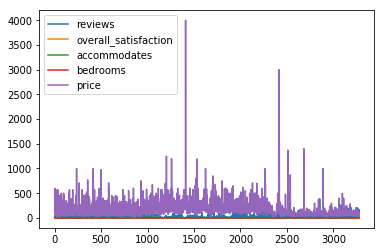

In [65]:
df_air_contrib.plot()

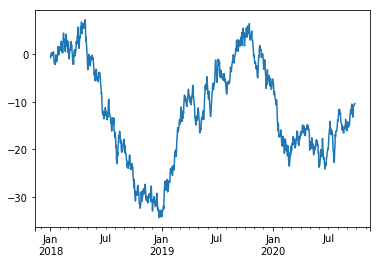

In [66]:
np.random.seed(1000)
ts=pd.Series(np.random.randn(1000),index=pd.date_range('1/1/2018',periods=1000))
ts=ts.cumsum() #누적합
ts.plot()

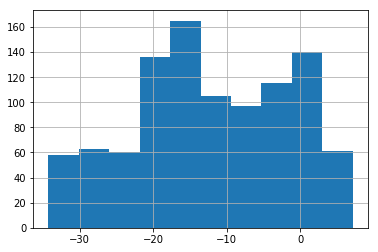

In [67]:
ts.hist()

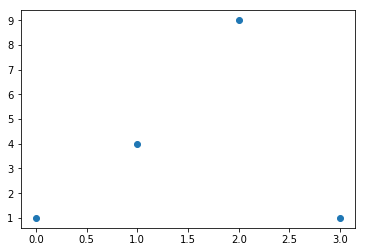

In [68]:
plt.plot([1, 4, 9, 1],'o')
plt.show()

## ○ 참고문서
***


 * [시계열 자료](https://datascienceschool.net/view-notebook/8959673a97214e8fafdb159f254185e9/)
 * [Pandas 기초](http://doorbw.tistory.com/172)
 * [Pandas 기초](http://pinkwink.kr/734?category=522424)
 * [Pandas 산술 연산](http://pyther.tistory.com/6)